# Reducing Features Using Principal Components (unsupervised)

In [1]:
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

In [3]:
digits = load_digits()

In [4]:
features = digits.data

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(features)

In [6]:
X.shape

(1797, 64)

In [7]:
PCA1 = PCA(0.99, whiten=True)

In [8]:
X_new = PCA1.fit_transform(X)

In [9]:
X_new.shape  #new data

(1797, 54)

In [59]:
digits.data.shape #original

(1797, 64)

In [60]:
def plot_digits(data):
    fig, axes = plt.subplots(7,7, figsize=(8,8), subplot_kw=dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8), cmap='binary')
        for j in ax.spines.values():
            j.set_visible(False)

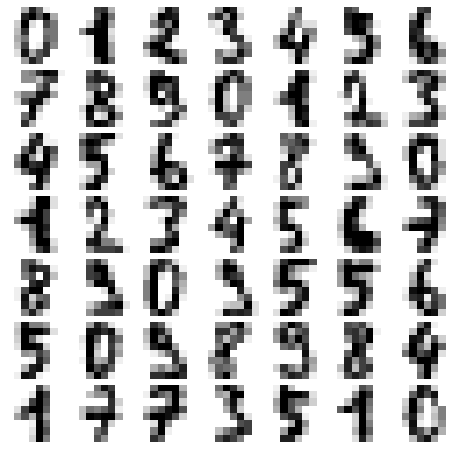

In [61]:
plot_digits(digits.data)

In [62]:
PCAa= PCA1.fit(X)

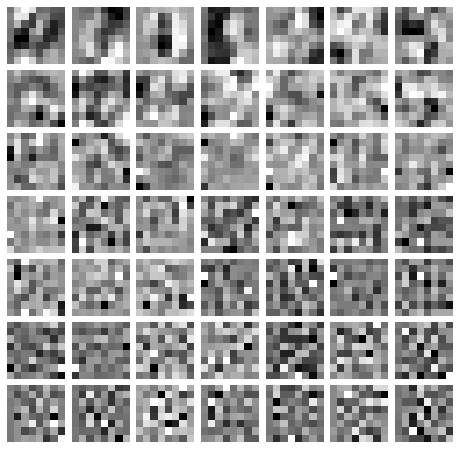

In [63]:
plot_digits(PCAa.components_)

In [64]:
PCAa.components_.shape

(54, 64)

# Reducing Features When Data Is Linearly Inseparable (unsupervised)

In [191]:
from sklearn.decomposition import KernelPCA

In [192]:
from sklearn.datasets import make_circles

In [193]:
features, y = make_circles(n_samples=1000, noise=0.1, factor=0.1)

In [194]:
r1 = np.exp(-(features ** 2).sum(1))

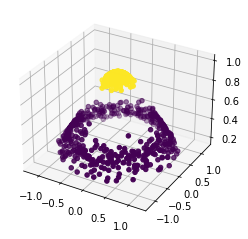

In [195]:
ax = plt.axes(projection='3d')
ax.scatter(features[:,0], features[:,1],r1,c=y)

In [196]:
kpca = KernelPCA(n_components=1, kernel = 'rbf', gamma=15)

In [197]:
new_=kpca.fit_transform(features)

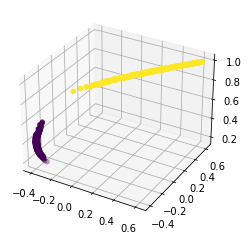

In [198]:
r2 = np.exp(-(new_** 2).sum(1))
ax = plt.axes(projection='3d')
ax.scatter(new_, new_,r1,  c=y)

In [199]:
kpca2 = KernelPCA(n_components=1, kernel ='poly', degree=10)

In [203]:
new_2=kpca2.fit_transform(features)

In [204]:
r = np.exp(-(new_2 ** 2).sum(1))

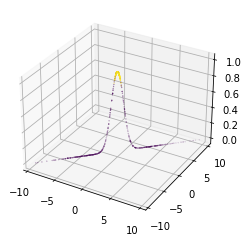

In [205]:
ax = plt.axes(projection='3d')
ax.scatter3D(new_2, new_2, r,c=y, s=0.05)

# Reducing Features by Maximizing Class Separability (supervised)

In [81]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [82]:
iris = load_iris()
features = iris.data
target = iris.target

In [83]:
iris.target_names[iris.target[1]]

'setosa'

In [84]:
iris.target.shape

(150,)

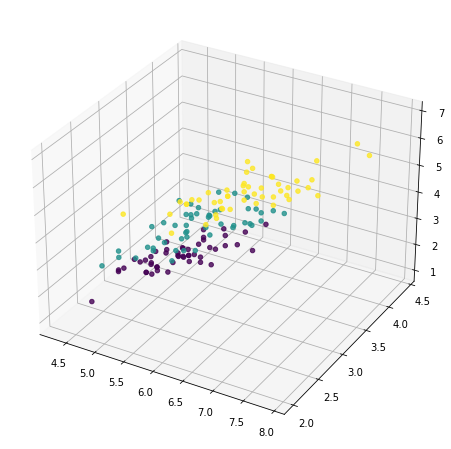

In [85]:
ax = plt.axes(projection='3d')
ax.scatter(features[:,0], features[:,1], features[:,2], c=target, alpha=0.8)
fig=plt.gcf()
fig.set_size_inches(8,8)

In [86]:
model = LinearDiscriminantAnalysis(n_components=1)

In [87]:
trans= model.fit(features, target).transform(features)

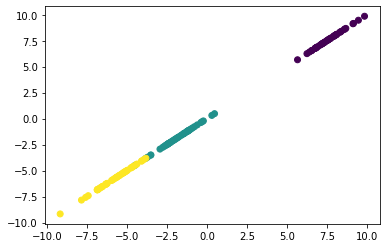

In [88]:
plt.scatter(trans, trans, c=target, cmap='viridis')

In [89]:
model.explained_variance_ratio_

array([0.9912126])

In [90]:
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(features,target)

LinearDiscriminantAnalysis()

In [91]:
var_ratio = lda.explained_variance_ratio_

In [92]:
def best_component1(var_ratio, goal):
    n_component = 0
    total_variance =0
    for i in var_ratio:
        total_variance += i 
        n_component += 1
        if total_variance >= goal:
            break    
    return n_component

In [93]:
best_component1(var_ratio,0.95)

1

In [96]:
var_ratio

array([0.9912126, 0.0087874])

# Reducing Features Using Matrix Factorization (unsupervised)

In [97]:
from sklearn.decomposition import NMF  #the best way for us to find the optimum value of n_components is by trying a range of values

In [98]:
model = NMF(n_components=10)

In [99]:
data_=model.fit(digits.data).components_

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [100]:
model.fit_transform(digits.data).shape

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(1797, 10)

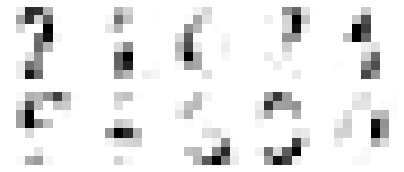

In [101]:
fig, axes = plt.subplots(2,5, figsize=(7,3), subplot_kw=dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(data_[i].reshape(8,8), cmap='binary')
    for j in ax.spines.values():
         j.set_visible(False)

# Reducing Features on Sparse Data (unsupervised)

In [102]:
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [103]:
features_ = StandardScaler().fit_transform(digits.data)
features_.shape

(1797, 64)

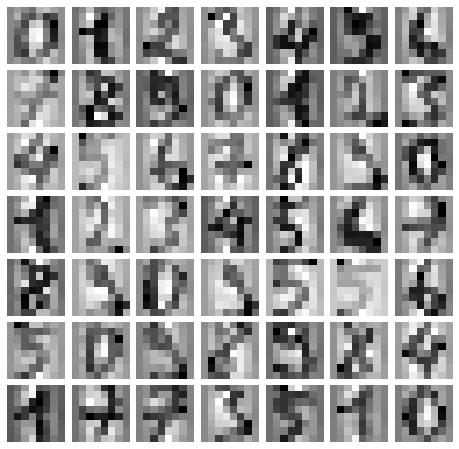

In [104]:
plot_digits(features_)

In [105]:
Xsparse = csr_matrix(features_)
Xsparse.shape

(1797, 64)

In [106]:
model = TruncatedSVD(n_components=10)

In [107]:
model.fit(Xsparse).components_.shape

(10, 64)

In [108]:
model.fit_transform(Xsparse).shape

(1797, 10)

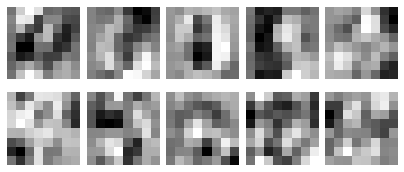

In [109]:
fig, axes = plt.subplots(2,5, figsize=(7,3), subplot_kw=dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(model.fit(Xsparse).components_[i].reshape(8,8), cmap='binary')
    for j in ax.spines.values():
         j.set_visible(False)

In [110]:
model.explained_variance_ratio_.sum()

0.5887306946244804

In [111]:
model2 = TruncatedSVD(n_components=Xsparse.shape[1]-1)

In [112]:
model2.fit(features_)

TruncatedSVD(n_components=63)

In [113]:
var_ratio1 = model2.explained_variance_ratio_

In [165]:
var_ratio1.shape

(63,)

In [215]:
def best_component1(var_ratio, goal):
    n_component = 0
    total_variance =0
    for i in var_ratio:
        total_variance += i 
        n_component += 1
        if total_variance >= goal:
            break    
    return n_component

In [216]:
best_component1(var_ratio1, 0.95)

40

In [219]:
def optimal_component(var_ratio, goal):
    n_component = 0
    total_variance = 0
    i = 0
    while total_variance < goal:
        total_variance= total_variance + var_ratio[i]
        n_component += 1
        i = i+1
    return n_component

In [220]:
optimal_component(var_ratio1, 0.95)

40